<h1> Historical data analysis of Corona Virus occurence</h1>
<h3> This notebook contains some exploratory data analysis about the occurences of Corona Virus in Brazil</h3>

In [2]:
# Importing necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlb
import seaborn as sns
from datetime import datetime

In [3]:
# Loading data
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_23f54ca27b98485386a4efcf3f160d7d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='3JHy42_t7rYPxAHLPOxC7b_X3kkgR0GzYYfGiMd0-7ox',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_23f54ca27b98485386a4efcf3f160d7d.get_object(Bucket='demandformechanicalventilators-donotdelete-pr-mncahddtnfndhl',Key='covidbrdata.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

covidbr = pd.read_excel(body)
covidbr.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN


In [4]:
covidbr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156067 entries, 0 to 156066
Data columns (total 16 columns):
regiao                   156067 non-null object
estado                   155966 non-null object
municipio                152467 non-null object
coduf                    156067 non-null int64
codmun                   153239 non-null float64
codRegiaoSaude           152467 non-null float64
nomeRegiaoSaude          152467 non-null object
data                     156067 non-null datetime64[ns]
semanaEpi                156067 non-null int64
populacaoTCU2019         155295 non-null object
casosAcumulado           156067 non-null int64
casosNovos               156067 non-null int64
obitosAcumulado          156067 non-null int64
obitosNovos              156067 non-null int64
Recuperadosnovos         47 non-null float64
emAcompanhamentoNovos    47 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(5)
memory usage: 19.1+ MB


In [5]:
print(' Maximum rows:', pd.get_option("display.max_rows"),'\n', 'Maximum columns:', pd.get_option('display.max_columns'))

 Maximum rows: 60 
 Maximum columns: 20


In [6]:
# # Increasing maximum rows and columns numbers
# pd.set_option('display.max_rows',200000)
# pd.set_option('display.max_columns',200000)
# print(' Maximum rows:', pd.get_option("display.max_rows"),'\n', 'Maximum columns:', pd.get_option('display.max_columns'))

I will split the data into individual dataframes for each region, including the one associated with data of Brazil in general

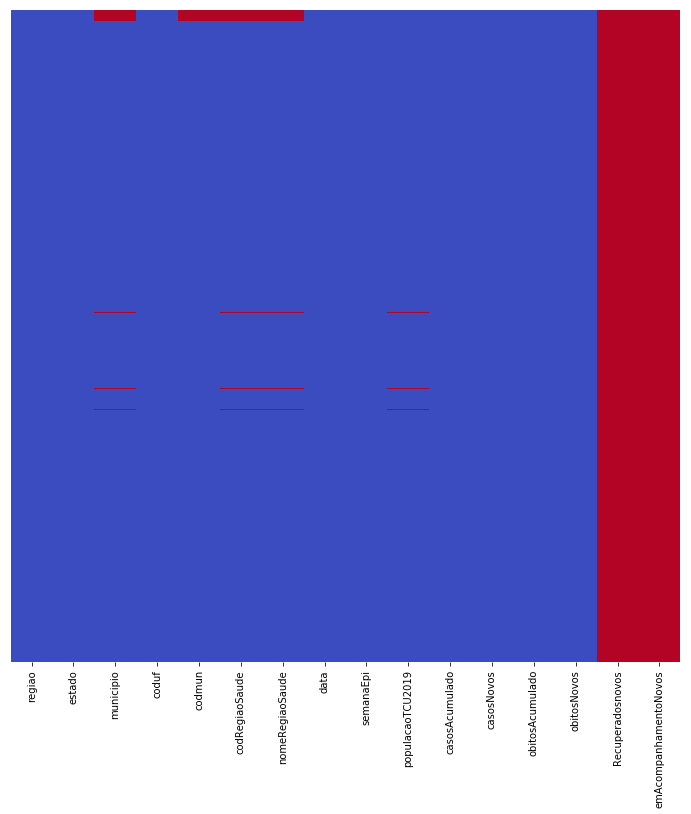

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(covidbr.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

The above map shows that columns ```RecuperadosNovos``` and ```emAcompanhamentoNovos``` are empty columns.

In [8]:
# Removing unnecessary columns
covidbr.drop(labels = ['Recuperadosnovos','emAcompanhamentoNovos'], axis = 1, inplace = True)

In [9]:
# Renaming columns:
new_columns = ['Region','State','City','UF code','City code' ,'Health Region Code','Health Region Name','Date', 'Week', 'Population', 'Accumulated Cases', 'New Cases', 'Accumulated Deaths', 'New Deaths']
trans = {}

for i in range(len(covidbr.columns)):
    trans[covidbr.columns[i]] = new_columns[i]
    
covidbr.rename(columns = trans, inplace = True )

In [10]:
covidbr.head()

,Region,State,City,UF code,City code,Health Region Code,Health Region Name,Date,Week,Population,Accumulated Cases,New Cases,Accumulated Deaths,New Deaths
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0


<b> Brazilian regions: </b> <br>
Nordeste: Northeast <br>
Norte: North <br>
Centro-oeste: Midwest <br>
Sudeste: Southeast <br>
Sul: South <br>

In [11]:
uniquecities = covidbr['City'].unique()
uniquecitycodes = covidbr['City code'].unique()

In [12]:
len(uniquecities)

4155

In [13]:
len(uniquecitycodes)

4374

There are more city codes filled in the data then city names. Let's try to recover the name of such cities.

In [14]:
# The following dataframe is a sub-dataframe of covidbr where City column is empty. I want to check what are the city codes present in data 
# where city name is not filled 
n_empty_citycodes = covidbr[covidbr['City'].isnull()]
n_empty_citycodes = n_empty_citycodes[~n_empty_citycodes['City code'].isnull()]

In [15]:
n_empty_citycodes['City code'].unique()

array([110000., 140000., 210000., 220000., 230000., 240000., 250000.,
       260000., 270000., 280000., 290000., 310000., 320000., 330000.,
       350000., 420000., 430000., 510000., 520000.])

The above City codes do not correspond to specific cities, but to their states. It is possible to verify this information in the link https://www.ibge.gov.br/explica/codigos-dos-municipios.php#RO

The number of city codes present in the data where city name is not filled is much smaller than the difference between the number of city names and the number of city codes. Let's investigate such difference from another perspective. 

In [16]:
# Checking if there is any non-empty city name on data where city code is empty

n_empty_citynames = covidbr[covidbr['City code'].isnull()]
n_empty_citynames = n_empty_citynames[~n_empty_citynames['City'].isnull()]
n_empty_citynames

,Region,State,City,UF code,City code,Health Region Code,Health Region Name,Date,Week,Population,Accumulated Cases,New Cases,Accumulated Deaths,New Deaths


There is no data with filled city name where city code is empty. Now we need to verify if the city codes are correctly associated with city names. My hypothesis is that some entries of city codes are filled with wrong city codes, but the majority of them is correct. If this is correct, we can replace the wrong codes by the mode of the code entries for each city, as the mode is the value that appears most of the times.

In [17]:
codes_names = covidbr[['City', 'City code']]
multiple_codes_cities = {}
for i in range(len(uniquecities)):
    codes_per_city =  codes_names[codes_names['City'] == uniquecities[i]]['City code'].unique()
    if len(codes_per_city) > 1:
        multiple_codes_cities[uniquecities[i]] = codes_per_city

multiple_codes_cities

{'Presidente Médici': array([110025., 210923.]),
 'Alto Paraíso': array([110040., 412862.]),
 'Buritis': array([110045., 310930.]),
 'Cruzeiro do Sul': array([120020., 410670., 430620.]),
 'Rio Branco': array([120040., 510720.]),
 'Humaitá': array([130170., 430970.]),
 'Itapiranga': array([130200., 420840.]),
 'Japurá': array([130210., 411240.]),
 'Tabatinga': array([130406., 355270.]),
 'Alto Alegre': array([140005., 350110.]),
 'Boa Vista': array([140010., 250215.]),
 'Bonfim': array([140015., 310810.]),
 'Iracema': array([140028., 230600.]),
 'Belém': array([150140., 250190., 270080.]),
 'Bonito': array([150160., 260230., 290405., 500220.]),
 'Capanema': array([150220., 410450.]),
 'Monte Alegre': array([150480., 240780.]),
 'Primavera': array([150610., 261140.]),
 'Redenção': array([150613., 231160.]),
 'Sapucaia': array([150775., 330540.]),
 'Alvorada': array([170070., 430060.]),
 'Araguanã': array([170215., 210087.]),
 'Cachoeirinha': array([170382., 260310., 430310.]),
 'Esperan

Some cities have more than one city code. It may be due to multiple cities have the same name, in different states. Let's do the last test, to verify if any of these city names have a number of occurences in multiple states different from the number of city codes for each city.

In [18]:
covidbr[covidbr['City'] == list(multiple_codes_cities.keys())[1]]['State'].nunique()

2

In [19]:
# Checking if the number of city codes is different of the number of states for each city name
wrong_cities = []
for i in range(len(multiple_codes_cities.keys())):
    x = covidbr[covidbr['City'] == list(multiple_codes_cities.keys())[i]]['State'].nunique()
    y = len(multiple_codes_cities[list(multiple_codes_cities.keys())[i]])
    if x != y:
        wrong_cities.extend([list(multiple_codes_cities.keys())[i]])
wrong_cities

[]

The above test shows that there is no city name with wrong number of occurences. For beginning the work with this data, let's create different dataframes for each region.

In [20]:
## Creating smaller dataframes for each Region
nordeste = covidbr[covidbr['Region'] == 'Nordeste']
sudeste = covidbr[covidbr['Region'] == 'Sudeste']
sul = covidbr[covidbr['Region'] == 'Sul']
norte = covidbr[covidbr['Region'] == 'Norte']
centro_oeste = covidbr[covidbr['Region'] == 'Centro-Oeste']
brasil = covidbr[covidbr['Region'] == 'Brasil']

In [21]:
# Dataframes grouped by date
nordeste_grouped = nordeste.groupby('Date').sum().reset_index()
sudeste_grouped = sudeste.groupby('Date').sum().reset_index()
sul_grouped = sul.groupby('Date').sum().reset_index()
norte_grouped = norte.groupby('Date').sum().reset_index()
centro_oeste_grouped = centro_oeste.groupby('Date').sum().reset_index()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


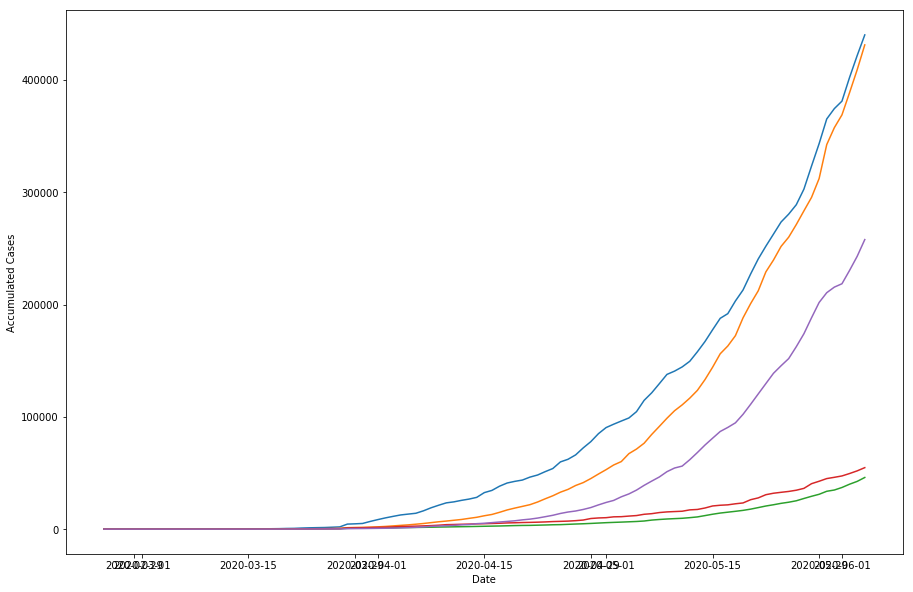

In [22]:
# Plotting graphic of Accumulated cases per region

# later configure x axis: https://matplotlib.org/3.1.1/api/dates_api.html , https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/date.html

plt.figure(figsize=(15,10))
ax = sns.lineplot(x=sudeste_grouped['Date'], y = 'Accumulated Cases', data = sudeste_grouped)
sns.lineplot(x = nordeste_grouped['Date'], y='Accumulated Cases', data= nordeste_grouped, axes=ax)
sns.lineplot(x = centro_oeste_grouped['Date'], y='Accumulated Cases', data= centro_oeste_grouped, axes=ax)
sns.lineplot(x = sul_grouped['Date'], y='Accumulated Cases', data= sul_grouped, axes=ax)
sns.lineplot(x = norte_grouped['Date'], y='Accumulated Cases', data= norte_grouped, axes=ax)
# plt.xticks(covidbr['Date'])

Let's constructing one dataframe per region, where cities are rows and dates are columns. First, let's verify the number of cities in each region:

In [23]:
print('Number of cities in each region:', '\n', 'Nordeste:', nordeste[~nordeste['City'].isnull()]['City'].nunique(), '\n',
      'Norte:',norte[~norte['City'].isnull()]['City'].nunique(), '\n', 
      'Centro-Oeste:',centro_oeste[~centro_oeste['City'].isnull()]['City'].nunique(), '\n',
      'Sudeste:',sudeste[~sudeste['City'].isnull()]['City'].nunique(), '\n',
      'Sul:', sul[~sul['City'].isnull()]['City'].nunique())

Number of cities in each region: 
 Nordeste: 1558 
 Norte: 402 
 Centro-Oeste: 308 
 Sudeste: 1202 
 Sul: 810


The number of cities in each region do not correspond to the real number of cities. Either the original data has some of the entries lacking the corresponding cities or the data do not contain information about the missing cities. I will not pursue information about cities missing in the original data, I will only deal with the cities explicitly presented in the data.

In [24]:
# List of dates
dates = sorted(list(covidbr['Date'].dt.strftime('%m/%d/%Y').unique()))

# Lists of cities in each region
nordeste_cities = sorted(list(nordeste[~nordeste['City'].isnull()]['City'].unique()))
norte_cities = sorted(list(norte[~norte['City'].isnull()]['City'].unique()))
centro_oeste_cities = sorted(list(centro_oeste[~centro_oeste['City'].isnull()]['City'].unique()))
sudeste_cities = sorted(list(sudeste[~sudeste['City'].isnull()]['City'].unique()))
sul_cities = sorted(list(sul[~sul['City'].isnull()]['City'].unique()))

In [25]:
# Creating dictionary to convert datetimes into easily readable strings

dates_str = {}
for i in range(len(dates)):
    dates_str[sorted(covidbr['Date'].unique())[i]] = dates[i]

In [26]:
# Defining function for creating a dataframe where rows are cities and columns are dates. 
# Inputs: df1 - DataFrame containing cities, dates and number of interest (accumulated cases, deaths, new cases, deaths...)
#         cities - list of cities
#         numcol - String with name of column of interest.

def citydaily_num(df1,cities,numcol):
    accdeaths = df1[df1['City'] == cities[0]][['Date',numcol]]
    accdeaths.rename(columns = {numcol: cities[0]}, inplace=True)
    for i in range(1,len(cities)):
        df2 = df1[df1['City']   == cities[i]][['Date',numcol]]
        df2.rename(columns = {numcol: cities[i]}, inplace=True)
        accdeaths = pd.merge(accdeaths, df2, on='Date', how = 'outer')
    accdeaths.sort_values(by='Date', axis=0, inplace = True)
    accdeaths['Date'] = accdeaths['Date'].dt.strftime('%m/%d/%Y')
    accdeaths.set_index('Date', inplace=True)
    accdeaths = accdeaths.transpose()
    return accdeaths

In [27]:
# Constructing individual dataframes of accumulated number of cases in each day for each city
acc_cases_region = {}
acc_cases_region['nordeste'] = citydaily_num(nordeste,nordeste_cities,'Accumulated Cases')

KeyboardInterrupt: 

In [ ]:
acc_cases_region['norte'] = citydaily_num(norte,norte_cities,'Accumulated Cases')

The following cells were an attempt of constructing dataframes of cities/date

In [62]:
# def accum_cases_df(dataframe):
    
acc_cols = sorted(list(covidbr[~covidbr['City'].isnull()].City.unique()))
acc_rows = sorted(list(covidbr['Date'].dt.strftime("%m/%d/%Y").unique()))

In [63]:
# Constructing dictionary to convert datetimes into readable strings

dates = {}
for i in range(len(acc_rows)):
    dates[sorted(covidbr['Date'].unique())[i]] = acc_rows[i]

In [64]:
covidbr['Date_str'] = covidbr['Date'].dt.strftime("%m/%d/%Y")
covidbr.head(20)

,Region,State,City,UF code,City code,Health Region Code,Health Region Name,Date,Week,Population,Accumulated Cases,New Cases,Accumulated Deaths,New Deaths,Date_str
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,02/25/2020
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,02/26/2020
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,02/27/2020
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,02/28/2020
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,02/29/2020
5,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-01,10,210147125,2,0,0,0,03/01/2020
6,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-02,10,210147125,2,0,0,0,03/02/2020
7,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-03,10,210147125,2,0,0,0,03/03/2020
8,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-04,10,210147125,3,1,0,0,03/04/2020
9,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-05,10,210147125,7,4,0,0,03/05/2020


In [65]:
df[0]

NameError: name 'df' is not defined

# SCRATCH:

In [ ]:
# Verifying emptyness of columns in "brasil" dataframe

plt.figure(figsize=(12,12))
sns.heatmap(brasil.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Dropping some columns
brasil.drop(labels=['estado','municipio','codmun','nomeRegiaoSaude'],axis=1,inplace=True)

In [ ]:
# # Converting date format in column 'data'
# brasil['data'] = brasil['data'].dt.strftime("%m/%d/%Y")
# brasil.head()

In [ ]:
new_labels = ['Region','UF code', 'Health Region Code','Date', 'Week', 'Population', 'Accumulated Cases', 'New Cases', 'Accumulated Deaths', 'New Deaths', 'New Recovers', 'Followed-up Cases']

In [ ]:
# Renaming dataframe columns
x = {}

for i in range(len(brasil.columns)):
    x[brasil.columns[i]] = new_labels[i]

brasil.rename(columns=x, inplace=True)

In [ ]:
brasil.head()

In [ ]:
covidbr.head()

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(covidbr.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
covidbr.drop(labels=['Recuperadosnovos','emAcompanhamentoNovos','coduf','codmun','codRegiaoSaude'],axis=1, inplace=True)

In [ ]:
covidbr.head()

In [ ]:
covidbr['estado'].value_counts()

In [ ]:
nordeste

In [ ]:
nordeste = covidbr[covidbr['regiao'] == 'Nordeste'].copy()
sudeste = covidbr[covidbr['regiao'] == 'Sudeste'].copy()
sul = covidbr[covidbr['regiao'] == 'Sul'].copy()
norte = covidbr[covidbr['regiao'] == 'Norte'].copy()
centro_oeste = covidbr[covidbr['regiao'] == 'Centro-Oeste'].copy()

In [ ]:
ax = sns.lineplot(x=)